<a href="https://colab.research.google.com/github/IbrahimNabid/Diabetas-Data-Analysis/blob/main/BALANCED_Diabetas_Data_Analysis_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd    
                                                        # Make sure pandas is loaded
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_binary_5050split_health_indicators_BRFSS2015.csv') # Note that pd.read_csv is used because we imported pandas as pd

Feature Selection. Goal: determining which features better help predict whether someone has diabetes

In [2]:
df.info()                                     #gets info on dfset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [5]:
#change data to int
df["Diabetes_binary"] = df["Diabetes_binary"].astype('int')
df["HighBP"] = df["HighBP"].astype('int')
df["HighChol"] = df["HighChol"].astype('int')
df["CholCheck"] = df["CholCheck"].astype('int')
df["BMI"] = df["BMI"].astype('int')
df["Smoker"] = df["Smoker"].astype('int')
df["Stroke"] = df["Stroke"].astype('int')
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype('int')
df["PhysActivity"] = df["PhysActivity"].astype('int')
df["Fruits"] = df["Fruits"].astype('int') 
df["Veggies"] = df["Veggies"].astype('int')
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype('int')
df["AnyHealthcare"] = df["AnyHealthcare"].astype('int')
df["NoDocbcCost"] = df["NoDocbcCost"].astype('int')
df["GenHlth"] = df["GenHlth"].astype('int')
df["MentHlth"] = df["MentHlth"].astype('int')
df["PhysHlth"] = df["PhysHlth"].astype('int')
df["DiffWalk"] = df["DiffWalk"].astype('int')
df["Sex"] = df["Sex"].astype('int')
df["Age"] = df["Age"].astype('int')
df["Education"] = df["Education"].astype('int')
df["Income"] =df["Income"].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int64
 1   HighBP                70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   Stroke                70692 non-null  int64
 7   HeartDiseaseorAttack  70692 non-null  int64
 8   PhysActivity          70692 non-null  int64
 9   Fruits                70692 non-null  int64
 10  Veggies               70692 non-null  int64
 11  HvyAlcoholConsump     70692 non-null  int64
 12  AnyHealthcare         70692 non-null  int64
 13  NoDocbcCost           70692 non-null  int64
 14  GenHlth               70692 non-null  int64
 15  MentHlth              70692 non-null  int64
 16  Phys

In [7]:
df.size                                       #the total number of array elements

1555224

In [8]:
df.shape                                          #the size of each dimension   

(70692, 22)

In [9]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [10]:
df.describe(include = 'all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [11]:
df.apply(pd.Series.value_counts)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,35346.0,30860.0,33529.0,1749.0,NaN,37094.0,66297.0,60243.0,20993.0,27443.0,...,3184.0,64053.0,NaN,48091.0,39915.0,52826.0,38386.0,NaN,NaN,NaN
1,35346.0,39832.0,37163.0,68943.0,NaN,33598.0,4395.0,10449.0,49699.0,43249.0,...,67508.0,6639.0,8282.0,2051.0,2853.0,17866.0,32306.0,979.0,75.0,3611.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,19872.0,3267.0,4102.0,NaN,NaN,1396.0,1647.0,4498.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23427.0,1967.0,2438.0,NaN,NaN,2049.0,3447.0,5557.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13303.0,981.0,1376.0,NaN,NaN,2793.0,19473.0,6658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for column in df.columns:
    print(column)
    print(df[column].value_counts().sort_index())
    print()

Diabetes_binary
0    35346
1    35346
Name: Diabetes_binary, dtype: int64

HighBP
0    30860
1    39832
Name: HighBP, dtype: int64

HighChol
0    33529
1    37163
Name: HighChol, dtype: int64

CholCheck
0     1749
1    68943
Name: CholCheck, dtype: int64

BMI
12     1
13     8
14     8
15    30
16    70
      ..
87    13
89     4
92     9
95     4
98     4
Name: BMI, Length: 80, dtype: int64

Smoker
0    37094
1    33598
Name: Smoker, dtype: int64

Stroke
0    66297
1     4395
Name: Stroke, dtype: int64

HeartDiseaseorAttack
0    60243
1    10449
Name: HeartDiseaseorAttack, dtype: int64

PhysActivity
0    20993
1    49699
Name: PhysActivity, dtype: int64

Fruits
0    27443
1    43249
Name: Fruits, dtype: int64

Veggies
0    14932
1    55760
Name: Veggies, dtype: int64

HvyAlcoholConsump
0    67672
1     3020
Name: HvyAlcoholConsump, dtype: int64

AnyHealthcare
0     3184
1    67508
Name: AnyHealthcare, dtype: int64

NoDocbcCost
0    64053
1     6639
Name: NoDocbcCost, dtype: int64

Gen

In [13]:
#print out top 20 most popular bmi 
print(df['BMI'].value_counts().sort_values(ascending=False).head(20))

27    6327
26    4975
28    4583
24    4392
30    4344
29    4219
25    4031
31    3753
32    3481
23    3315
33    3159
22    2778
34    2564
35    2107
21    2028
36    1794
37    1607
38    1415
20    1256
39    1189
Name: BMI, dtype: int64


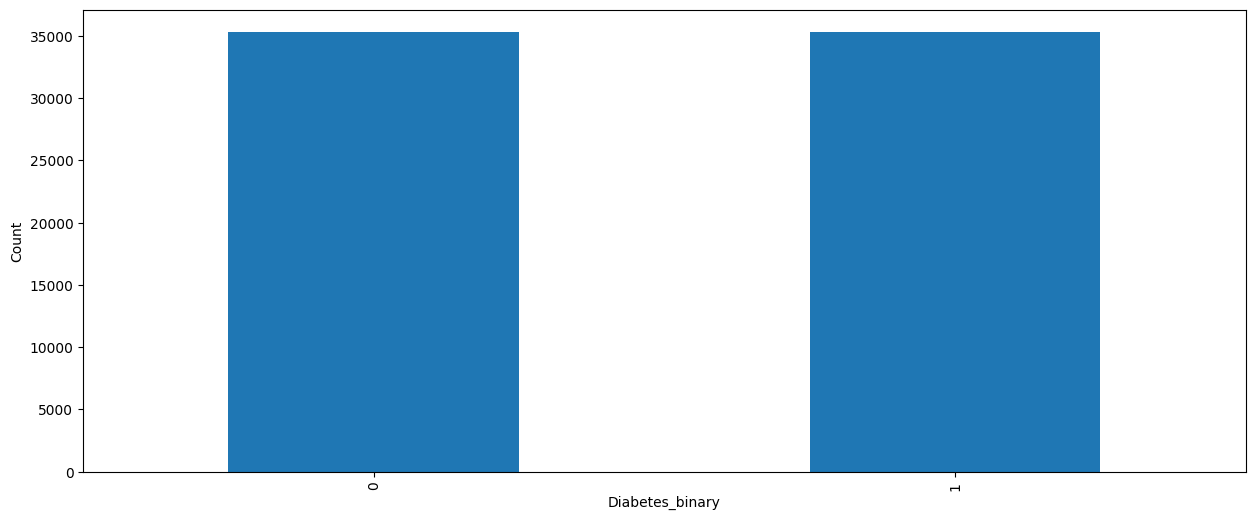

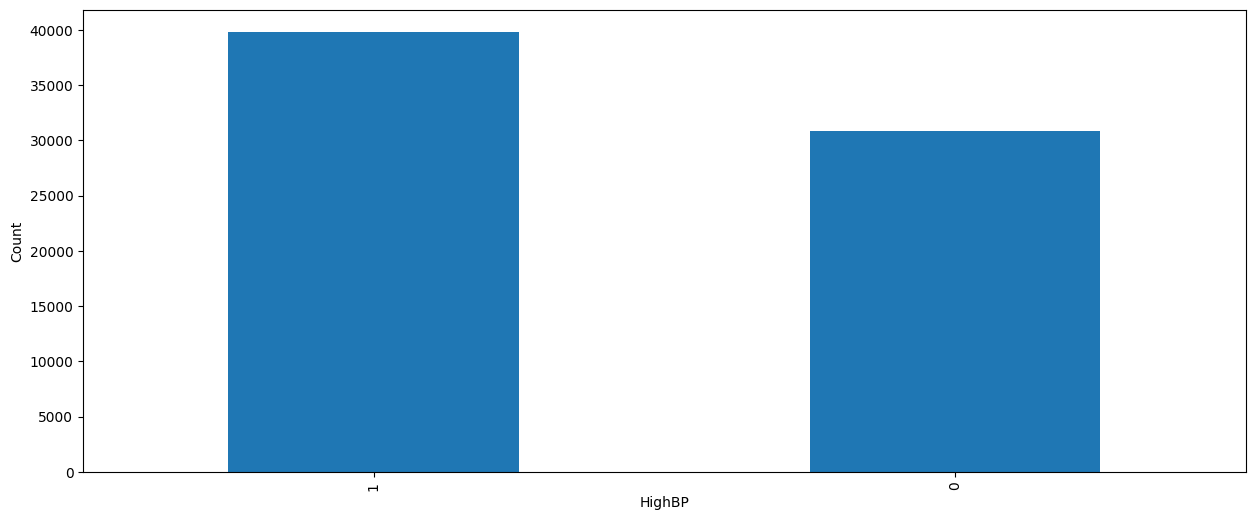

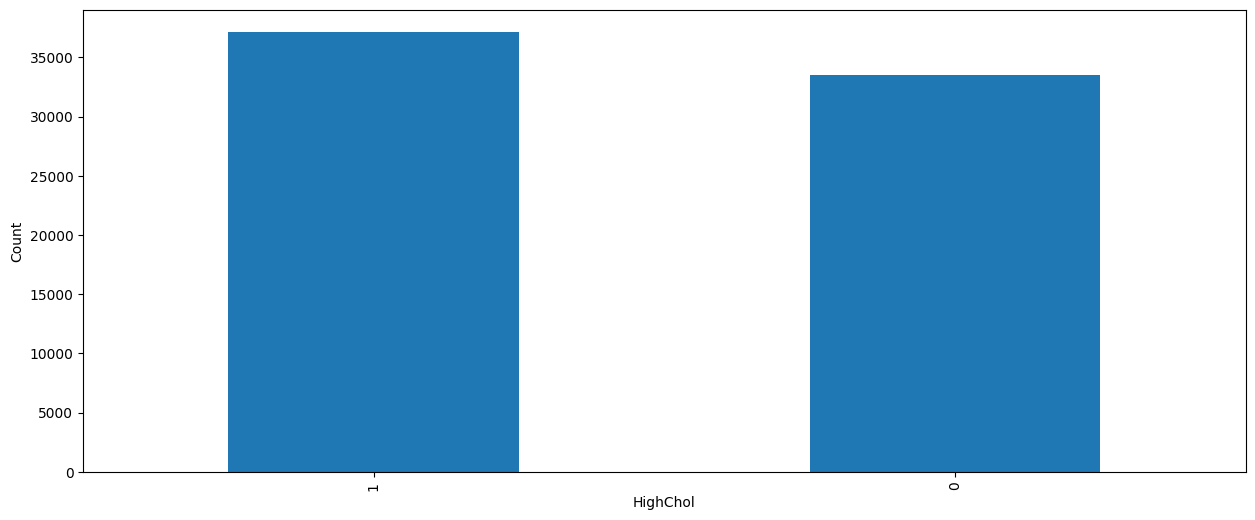

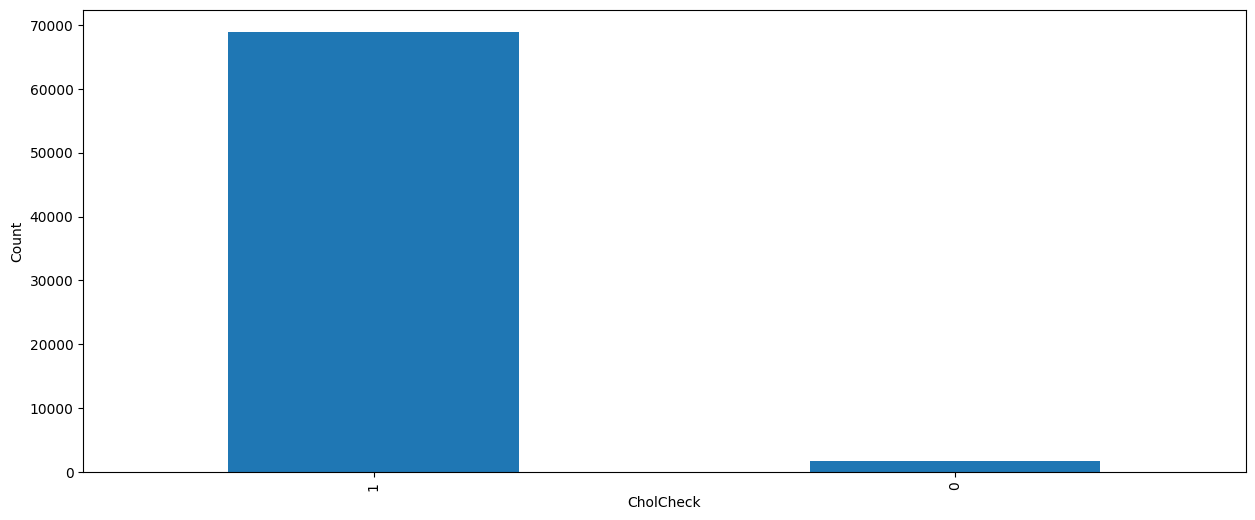

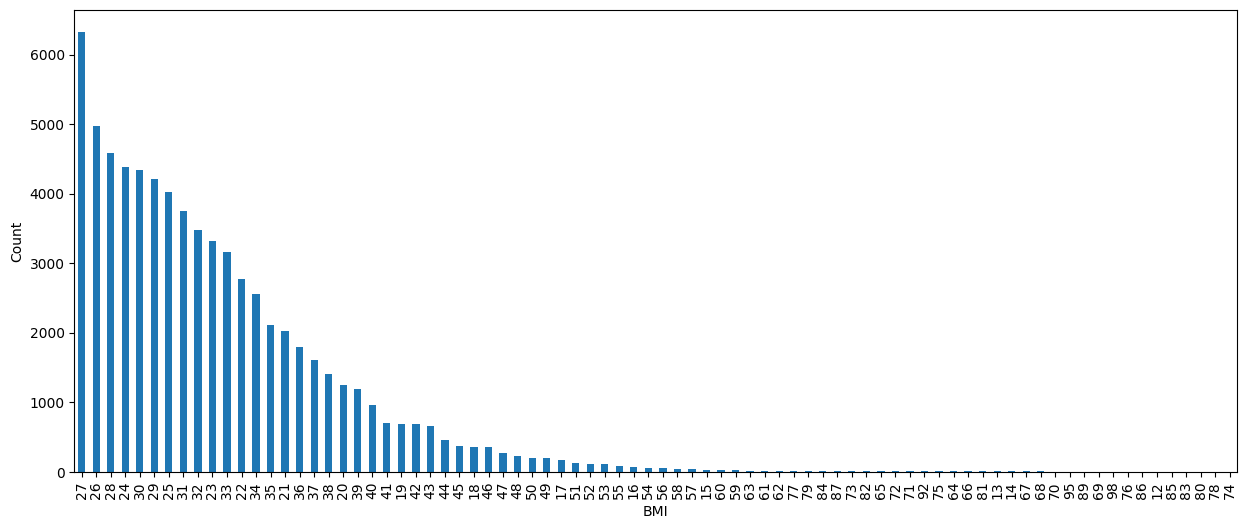

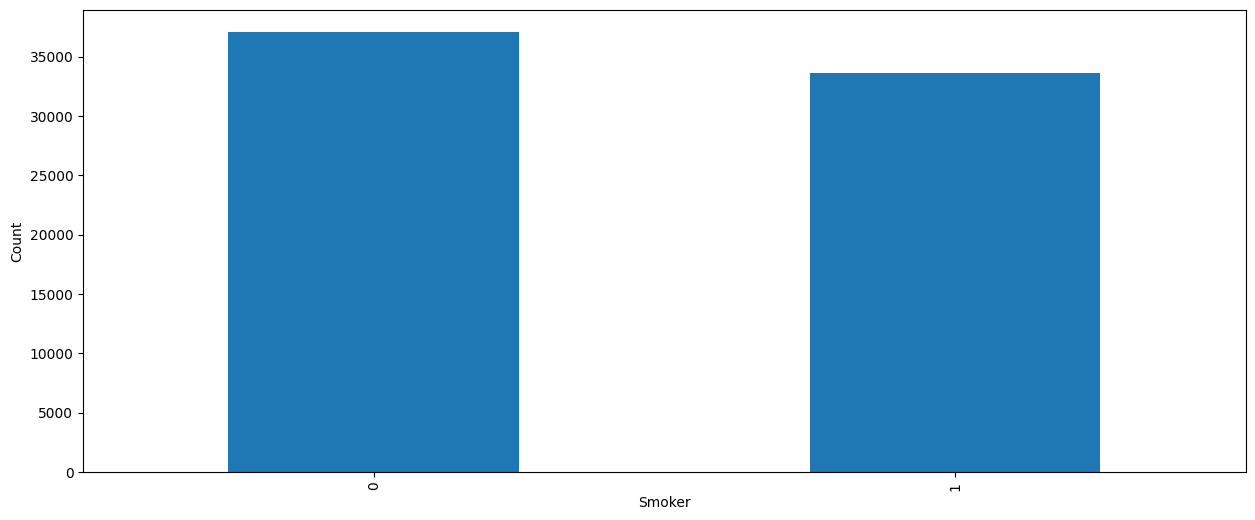

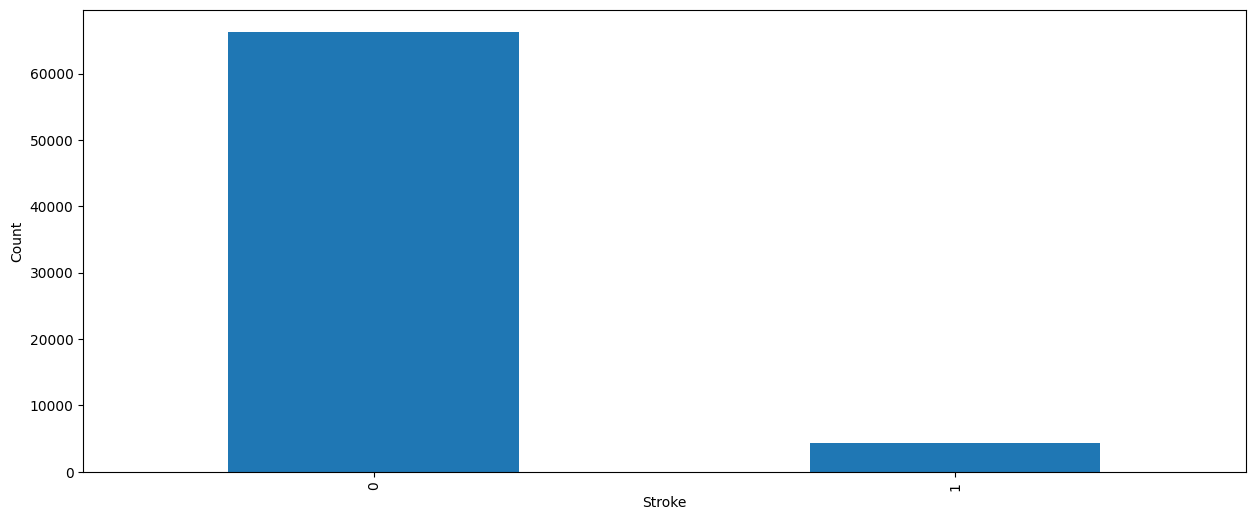

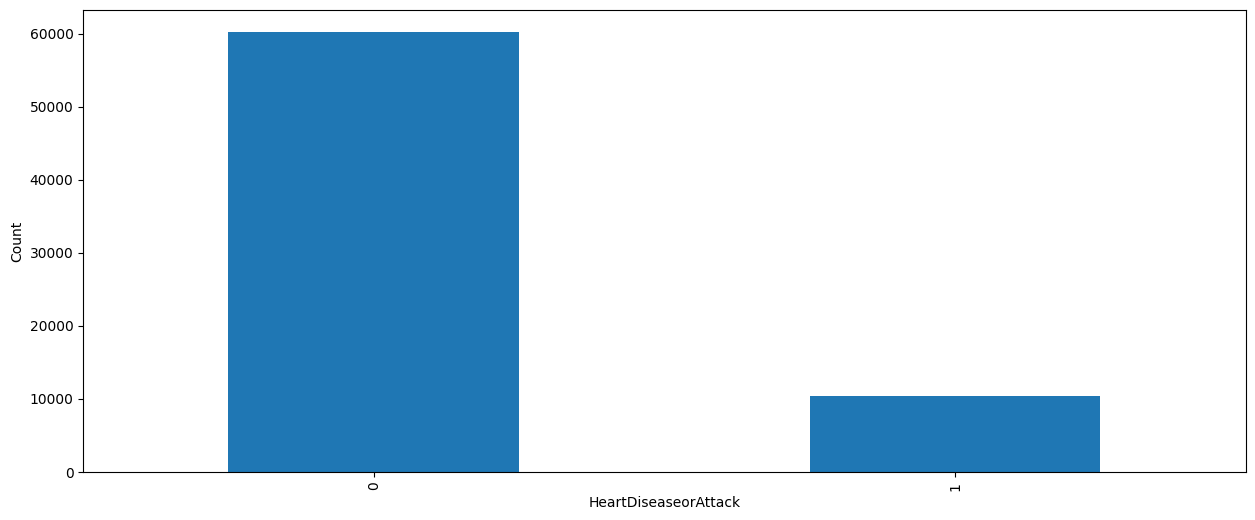

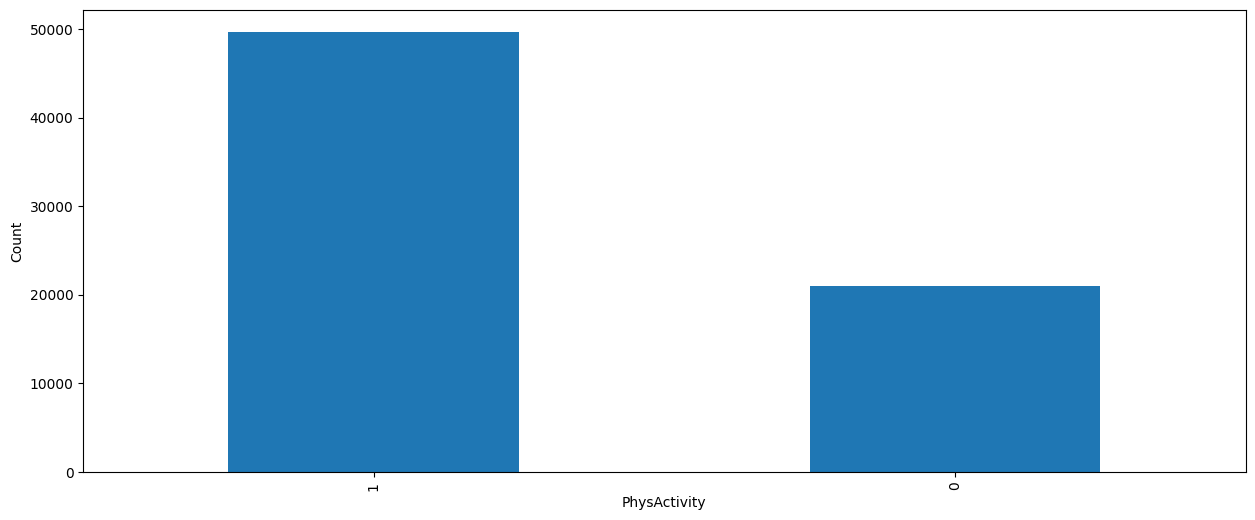

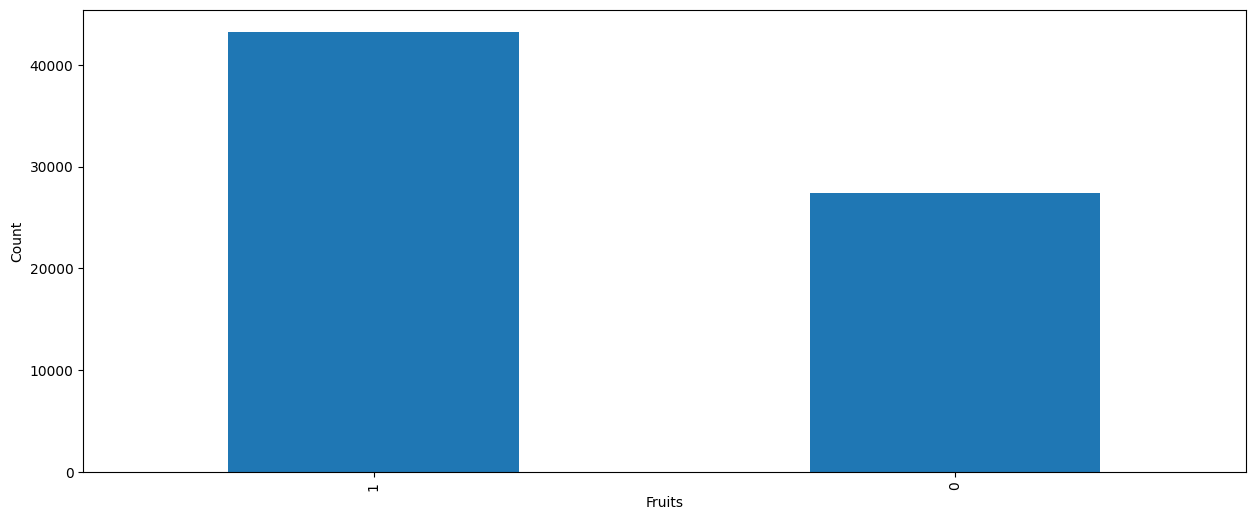

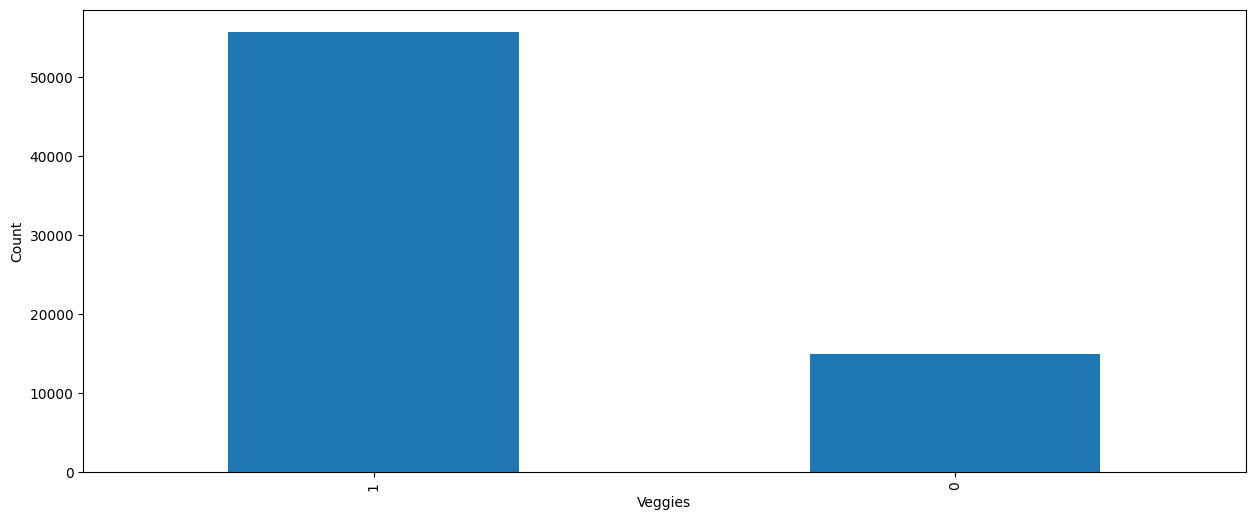

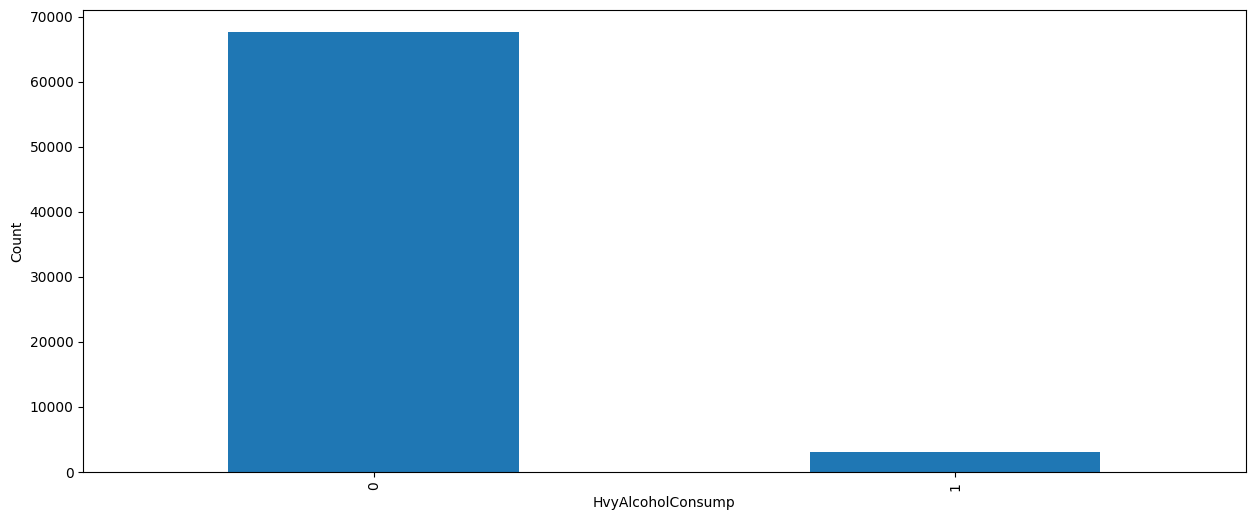

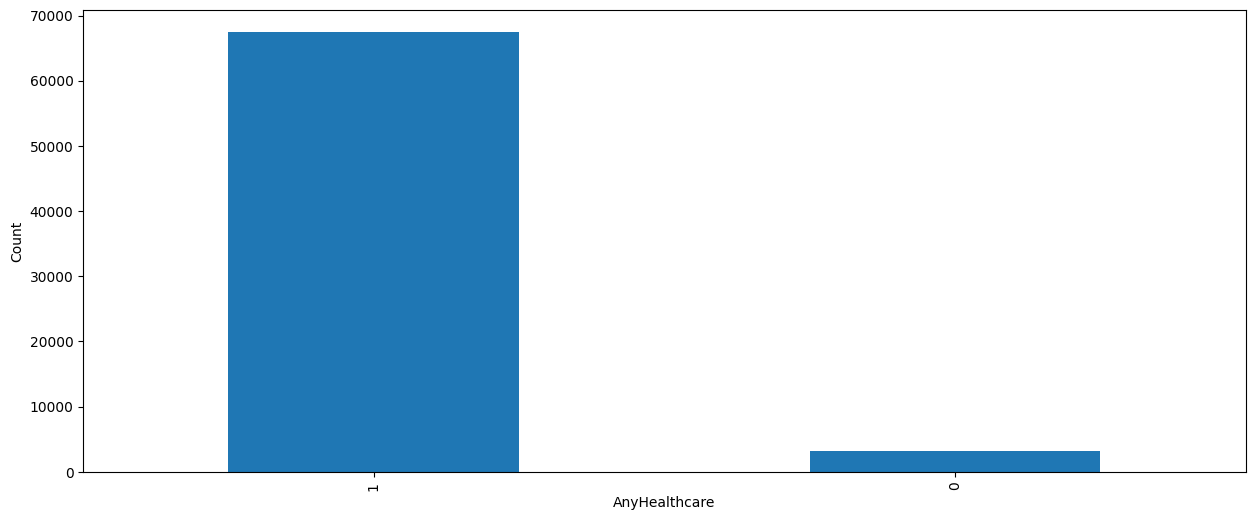

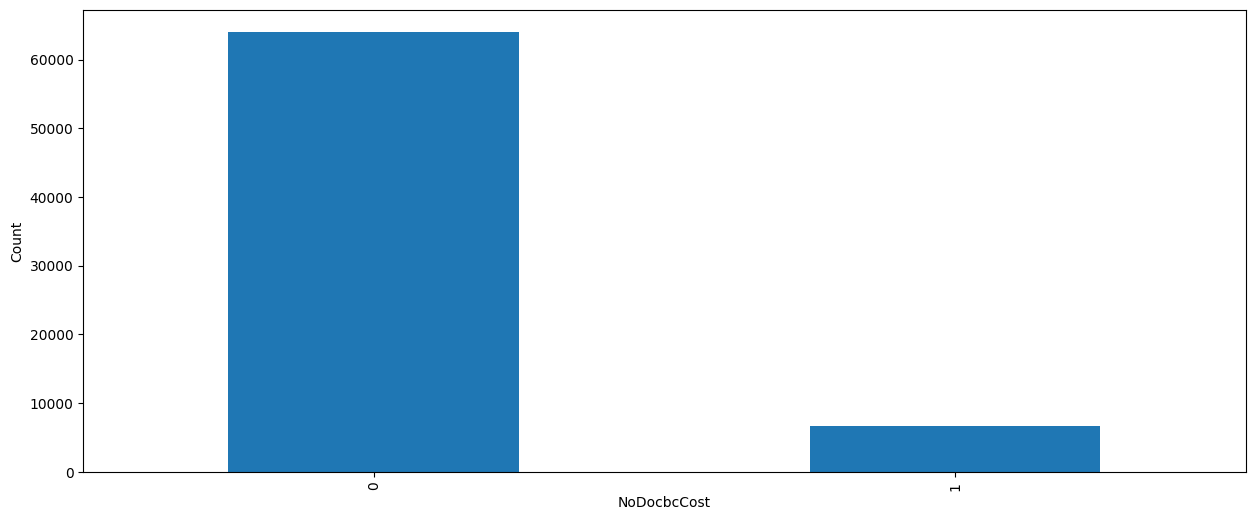

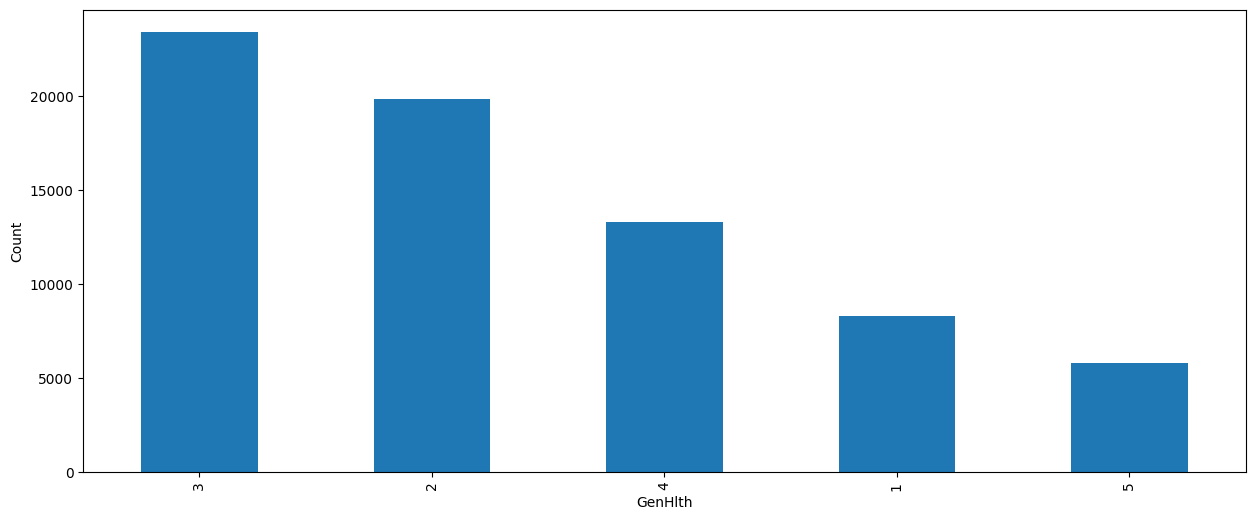

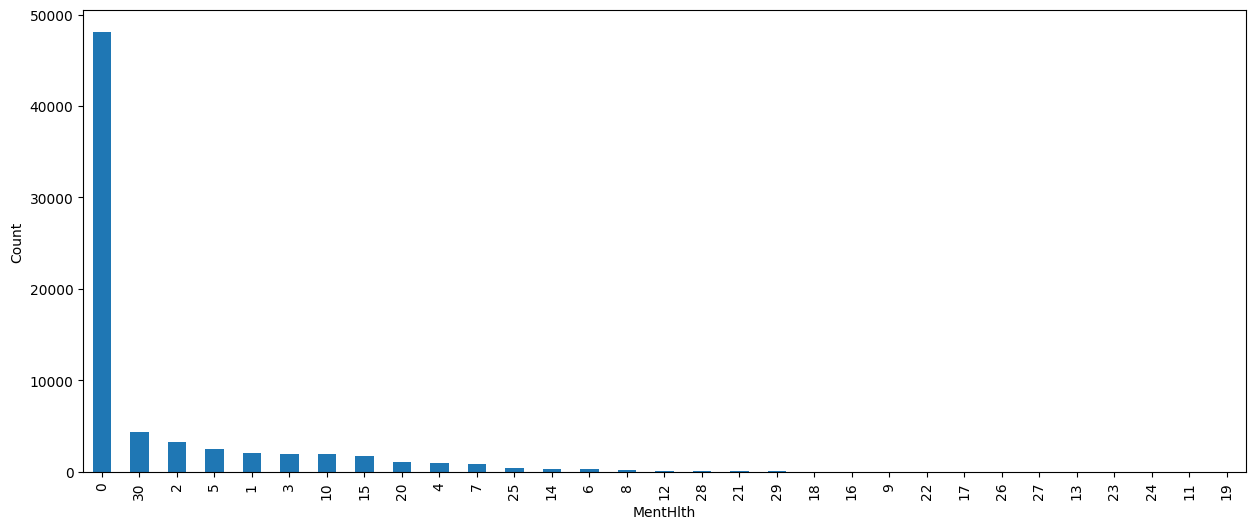

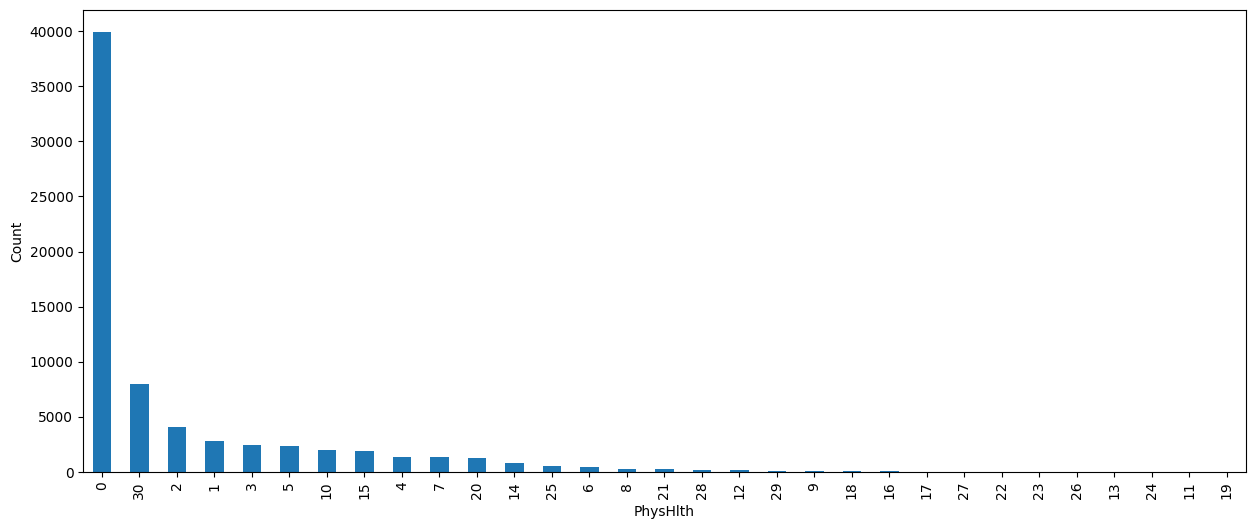

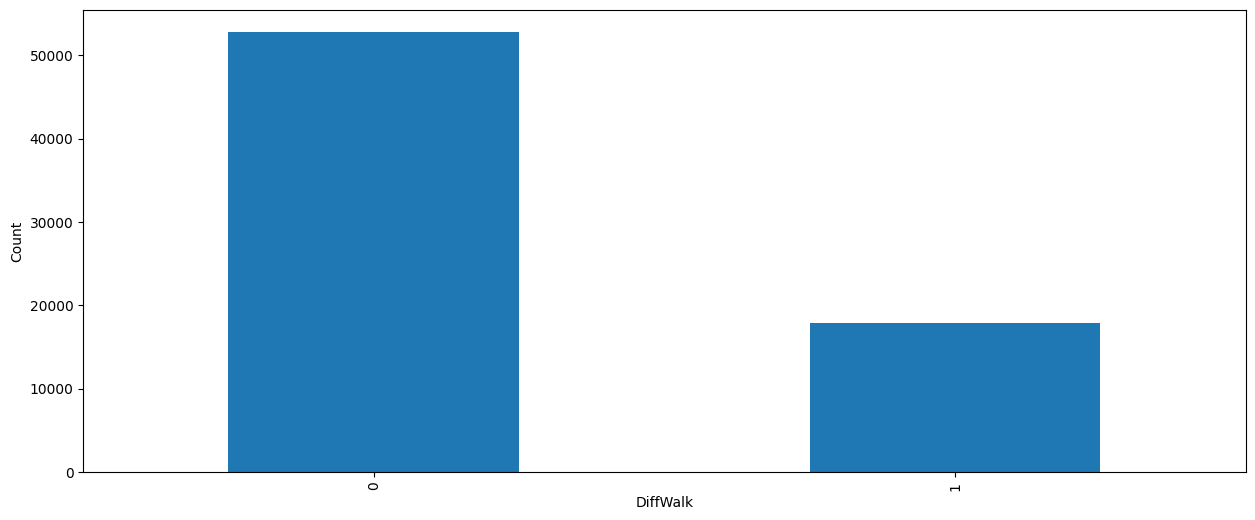

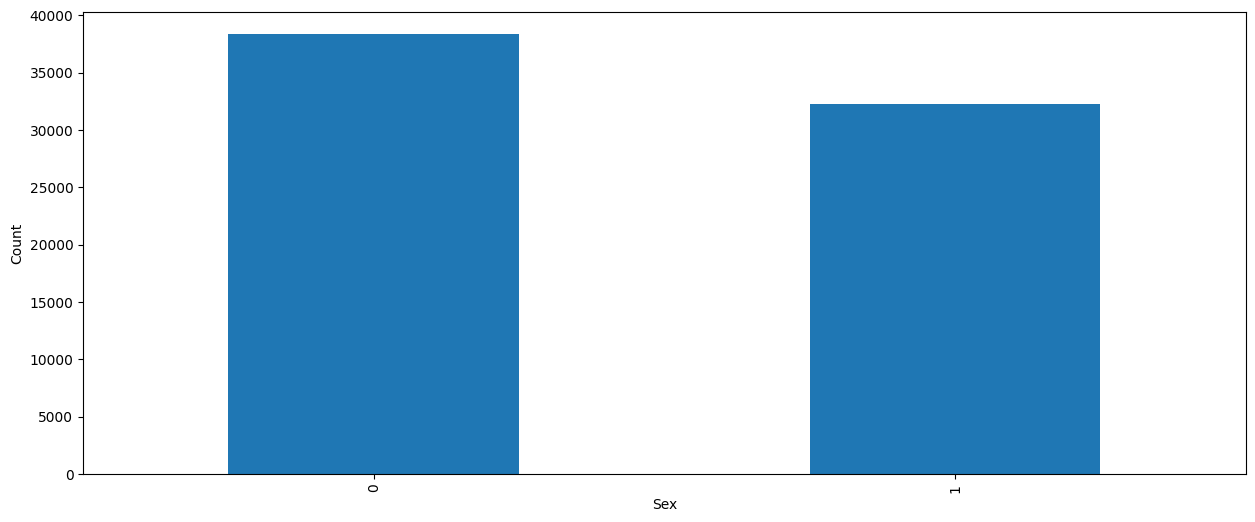

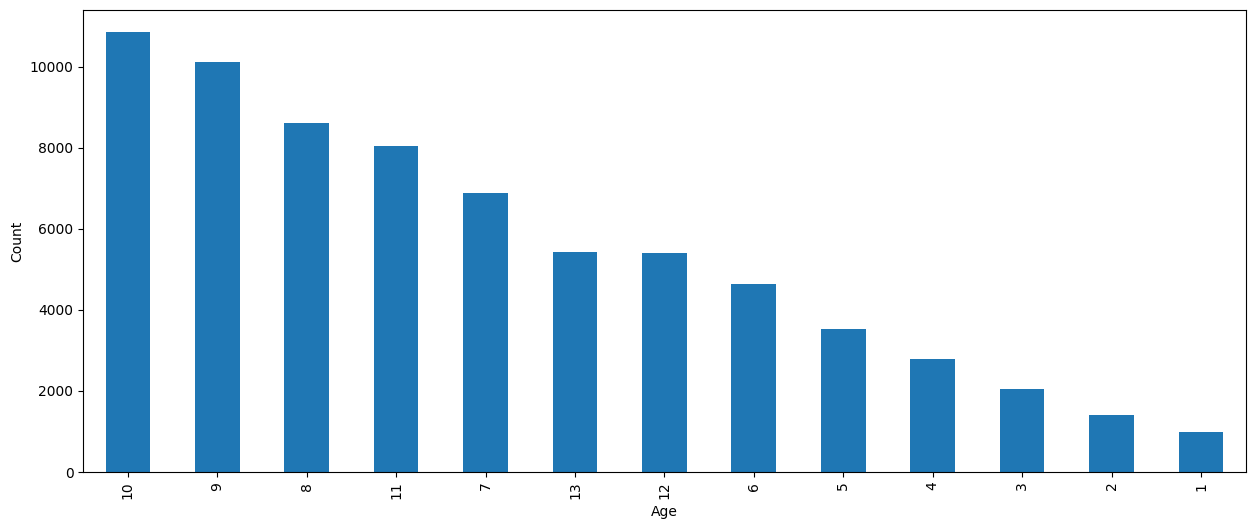

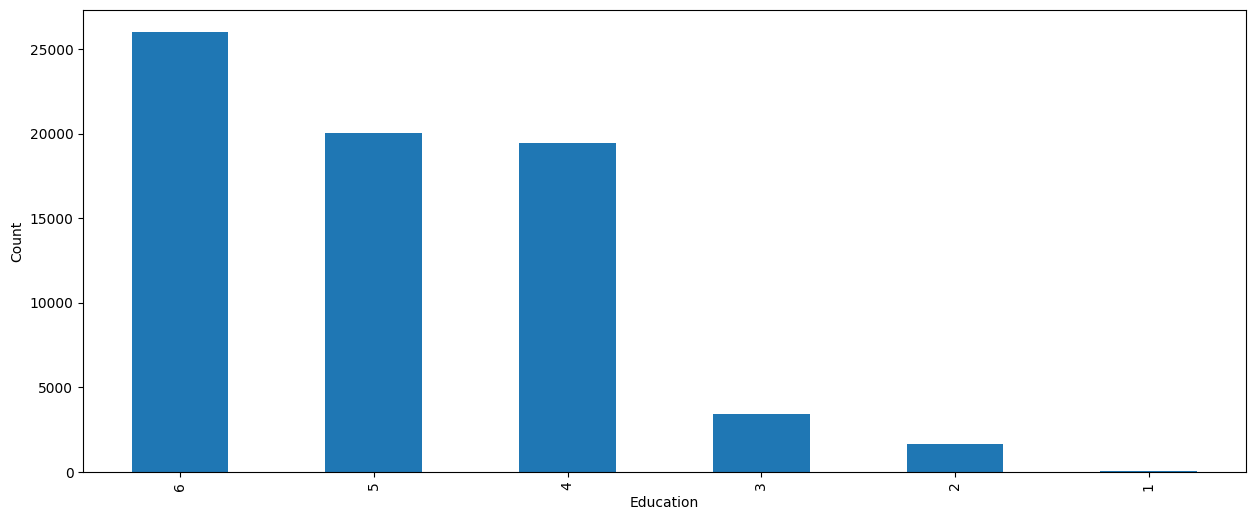

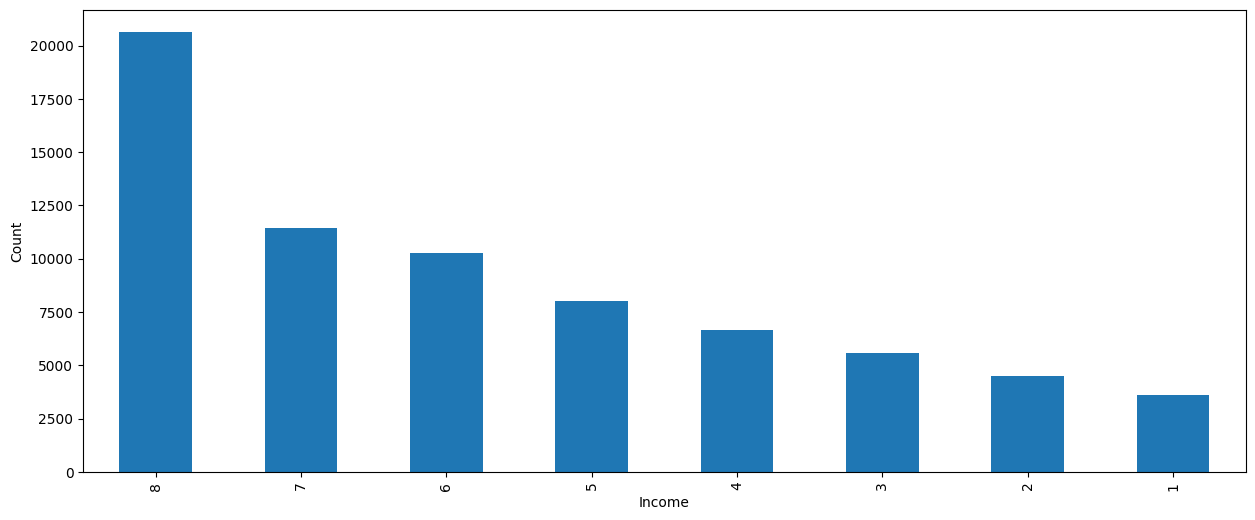

In [14]:
for col in df.columns:
    # Get a count of the occurrences of each unique value in the column
    value_counts = df[col].value_counts()

    # Plot a bar chart for the value counts of the column
    ax = value_counts.plot(kind='bar', figsize=(15, 6))
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.show()

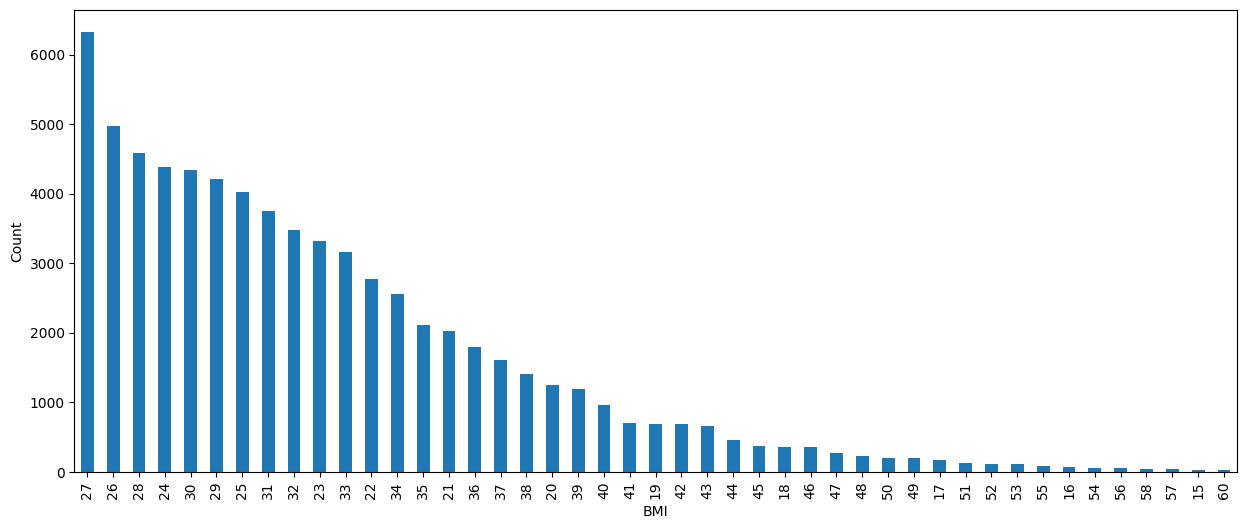

In [15]:
#printing out bmi bar graph with top 45 for slides 
# Get a count of the occurrences of each unique value in the BMI column
value_counts = df['BMI'].value_counts().head(45)

# Plot a bar chart for the value counts of the BMI column
ax = value_counts.plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('BMI')
ax.set_ylabel('Count')
plt.show()

In [16]:
df.corr()  #check correlation 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


In [17]:
corr_matrix = df.corr()         
print(corr_matrix['Diabetes_binary'])       #only prints corr between Diabetes_binary and rest

Diabetes_binary         1.000000
HighBP                  0.381516
HighChol                0.289213
CholCheck               0.115382
BMI                     0.293373
Smoker                  0.085999
Stroke                  0.125427
HeartDiseaseorAttack    0.211523
PhysActivity           -0.158666
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
AnyHealthcare           0.023191
NoDocbcCost             0.040977
GenHlth                 0.407612
MentHlth                0.087029
PhysHlth                0.213081
DiffWalk                0.272646
Sex                     0.044413
Age                     0.278738
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


In [18]:
abs_corr = abs(df.corr(numeric_only=False)['Diabetes_binary'])
top15_features = abs_corr.sort_values(ascending=True)[1:16].index.tolist()
print(top15_features)

['NoDocbcCost', 'Sex', 'Fruits', 'Veggies', 'Smoker', 'MentHlth', 'HvyAlcoholConsump', 'CholCheck', 'Stroke', 'PhysActivity', 'Education', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'DiffWalk']


In [19]:
abs_corr = abs(df.corr(numeric_only=False)['Diabetes_binary'])
top15_features = abs_corr.sort_values(ascending=False)[1:16]

print("Top 15 features correlated with Diabetes_binary:")
for feature, corr in top15_features.items():
    print(f"{feature} : {corr:.3f}")

Top 15 features correlated with Diabetes_binary:
GenHlth : 0.408
HighBP : 0.382
BMI : 0.293
HighChol : 0.289
Age : 0.279
DiffWalk : 0.273
Income : 0.224
PhysHlth : 0.213
HeartDiseaseorAttack : 0.212
Education : 0.170
PhysActivity : 0.159
Stroke : 0.125
CholCheck : 0.115
HvyAlcoholConsump : 0.095
MentHlth : 0.087


In [20]:
# Print unique values for columns
print('Unique values in column CholCheck:', df['CholCheck'].unique())
print('Unique values in column BMI:', df['BMI'].unique())
print('Unique values in column Smoker:', df['Smoker'].unique())
print('Unique values in column Stroke:', df['Stroke'].unique())
print('Unique values in column HeartDiseaseorAttack:', df['HeartDiseaseorAttack'].unique())
print('Unique values in column PhysActivity:', df['PhysActivity'].unique())
print('Unique values in column Fruits:', df['Fruits'].unique())
print('Unique values in column Veggies:', df['Veggies'].unique())
print('Unique values in column HvyAlcoholConsump:', df['HvyAlcoholConsump'].unique())
print('Unique values in column AnyHealthcare:', df['AnyHealthcare'].unique())
print('Unique values in column NoDocbcCost:', df['NoDocbcCost'].unique())
print('Unique values in column GenHlth:', df['GenHlth'].unique())
print('Unique values in column MentHlth:', df['MentHlth'].unique())
print('Unique values in column PhysHlth:', df['PhysHlth'].unique())
print('Unique values in column DiffWalk:', df['DiffWalk'].unique())
print('Unique values in column Sex:', df['Sex'].unique())
print('Unique values in column Age:', df['Age'].unique())
print('Unique values in column Education:', df['Education'].unique())
print('Unique values in column Income:', df['Income'].unique())

Unique values in column CholCheck: [1 0]
Unique values in column BMI: [26 28 29 18 31 32 27 24 21 58 30 20 22 38 40 25 36 47 19 37 41 23 34 35
 42 17 33 44 15 52 69 56 45 39 92 53 98 50 46 79 48 16 63 72 54 49 68 43
 84 73 76 55 51 75 57 60 12 77 82 67 71 61 14 81 59 86 13 87 65 95 89 62
 64 66 85 70 83 80 78 74]
Unique values in column Smoker: [0 1]
Unique values in column Stroke: [0 1]
Unique values in column HeartDiseaseorAttack: [0 1]
Unique values in column PhysActivity: [1 0]
Unique values in column Fruits: [0 1]
Unique values in column Veggies: [1 0]
Unique values in column HvyAlcoholConsump: [0 1]
Unique values in column AnyHealthcare: [1 0]
Unique values in column NoDocbcCost: [0 1]
Unique values in column GenHlth: [3 1 2 4 5]
Unique values in column MentHlth: [ 5  0  7  3  4  2 30 20  1 15 10 25 14 28  6 29 26 12 16 22 13  8  9 21
 18 17 27 24 23 11 19]
Unique values in column PhysHlth: [30  0 10  3  6  4 15  1  2 14  7 25 21 20  5  8 22 23 29 12 18 28 26 24
 27 11 13 16 17  

Observation: 
GenHlth and PhysHlth have postive relation with each other.
GenHlth and Income have negative relation with each other.

Observation: There is a positive corelation between Diabetes_binary and genhealth,highbp,bmi and difwalk. There is a negative correlation between diabete_binary and income,education and physical activty.

In [21]:
df.isnull().sum() #check null vals

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Text(0.5, 1.0, 'correlation of all 22 features')

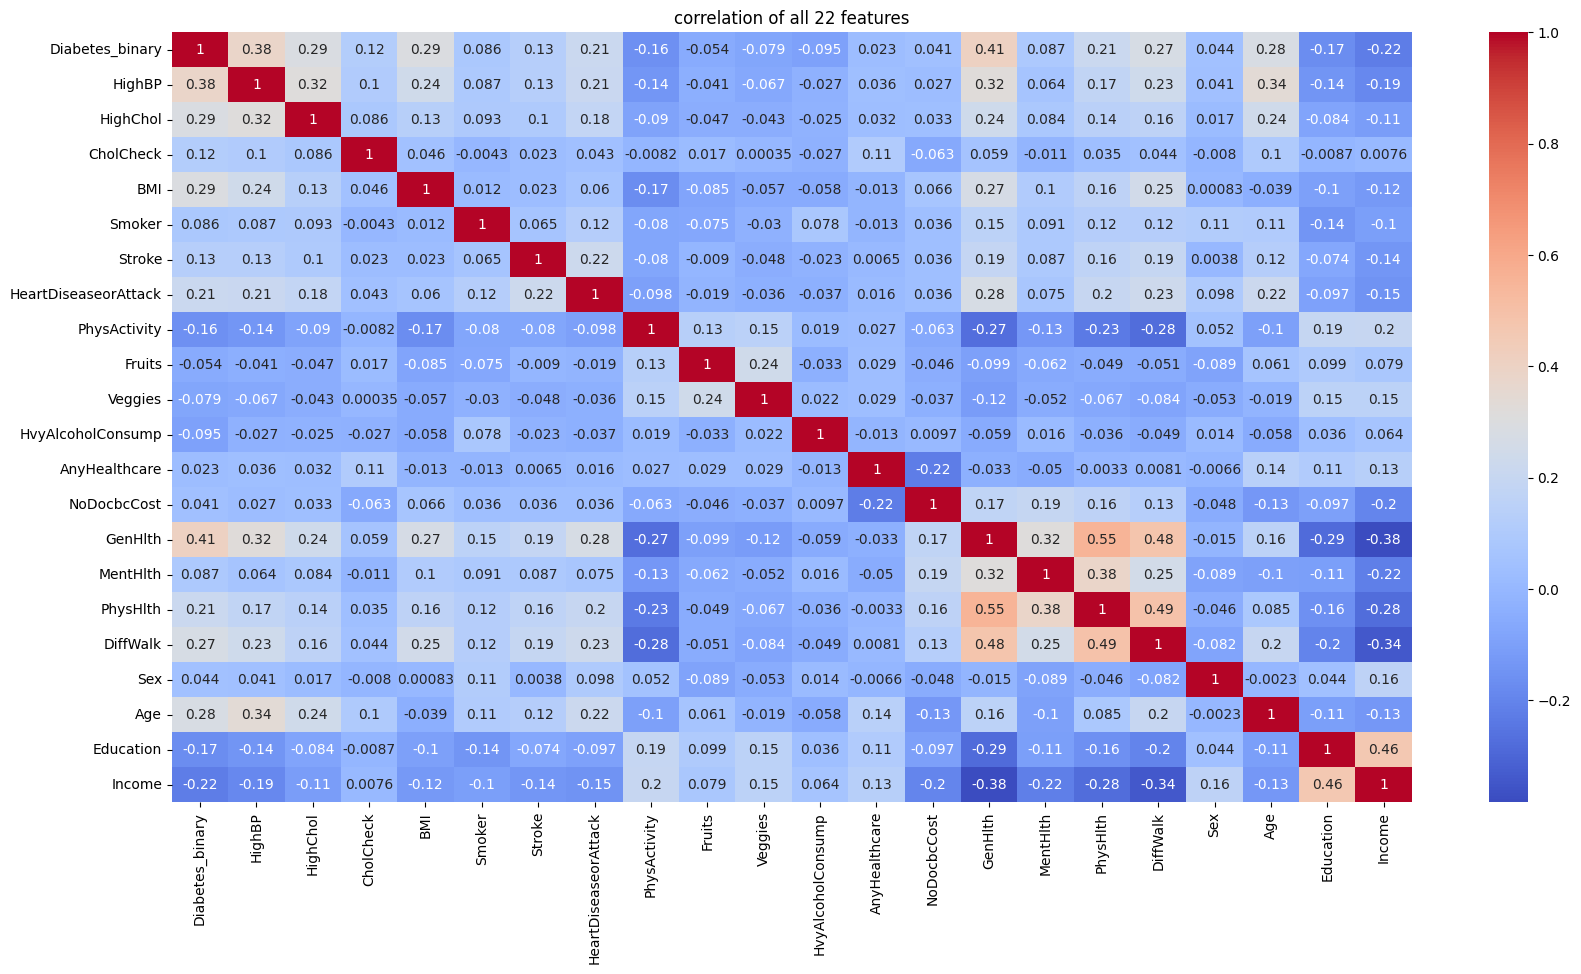

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='coolwarm' )
plt.title("correlation of all 22 features")

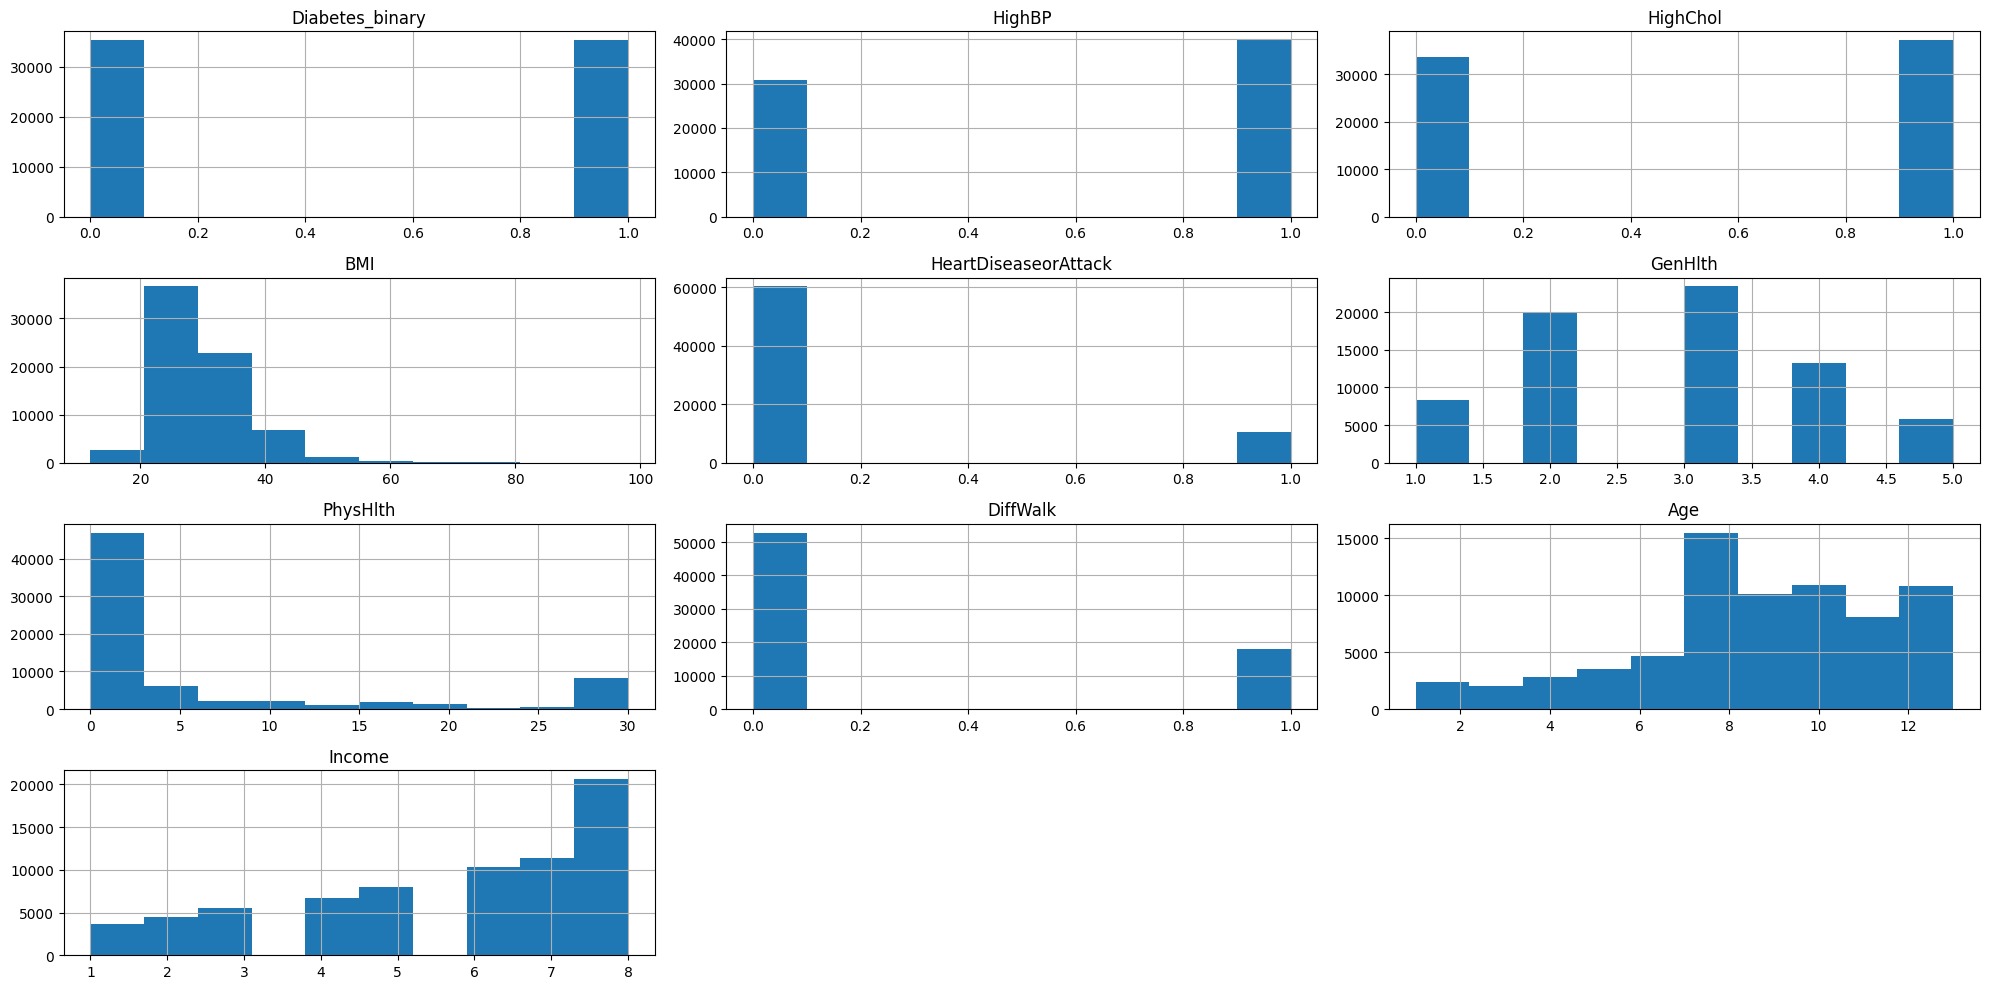

In [23]:
df[['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']].hist(figsize=(20,10))
plt.tight_layout()
plt.show()

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate the target variable and the features
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# select the k best features using chi-square test
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)

# get the scores and p-values of the features
scores = selector.scores_
pvalues = selector.pvalues_

# print the results
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: score={scores[i]}, p-value={pvalues[i]}")

HighBP: score=4491.799959831292, p-value=0.0
HighChol: score=2804.5012781530017, p-value=0.0
CholCheck: score=23.284292821606254, p-value=1.397365311851878e-06
BMI: score=10312.875794660413, p-value=0.0
Smoker: score=274.34061551282815, p-value=1.2850451658159551e-61
Stroke: score=1042.9763367463026, p-value=8.183772083340152e-229
HeartDiseaseorAttack: score=2695.4013781223084, p-value=0.0
PhysActivity: score=528.4940340851929, p-value=6.005936675735537e-117
Fruits: score=80.25084973062961, p-value=3.2977063521101807e-19
Veggies: score=93.88350071736012, p-value=3.34652091544133e-22
HvyAlcoholConsump: score=608.8529801324503, p-value=1.9871409285413256e-134
AnyHealthcare: score=1.7123896427090122, p-value=0.19067561989911969
NoDocbcCost: score=107.55008284380177, p-value=3.3727386477028874e-25
GenHlth: score=5133.52962968503, p-value=0.0
MentHlth: score=9491.55525771097, p-value=0.0
PhysHlth: score=55929.05325380402, p-value=0.0
DiffWalk: score=3926.8653307959253, p-value=0.0
Sex: scor

In [25]:
# Select top 15 features using chi-square test
top_15_features = SelectKBest(chi2, k=15).fit(X, y)

# Print top 15 features based on chi-square score
feature_scores = pd.DataFrame({'feature': X.columns, 'score': top_15_features.scores_})
top_15 = feature_scores.nlargest(15, 'score')
print(top_15)

                 feature         score
15              PhysHlth  55929.053254
3                    BMI  10312.875795
14              MentHlth   9491.555258
18                   Age   5204.869946
13               GenHlth   5133.529630
0                 HighBP   4491.799960
16              DiffWalk   3926.865331
20                Income   2956.984221
1               HighChol   2804.501278
6   HeartDiseaseorAttack   2695.401378
5                 Stroke   1042.976337
10     HvyAlcoholConsump    608.852980
7           PhysActivity    528.494034
19             Education    442.144248
4                 Smoker    274.340616


Based on outside research


HighBP: Valid 


Supporting Evidence: "The first main finding of the present study is that not only does the presence of hypertension predict future diabetes, in agreement with earlier epidemiological observations 2, 3, 8, 9, but also that the incidence of hypertension increases significantly in the presence of diabetes" (Hypertension and diabetes: co-prediction and time trajectories Research paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5877818/#:~:text=The%20first%20main%20finding%20of,in%20the%20presence%20of%20diabetes.)


GeneralHealth: Valid

Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.


DiffWalk: Valid

Supporting Evidence: "Chronically elevated blood sugars can also damage nerves that tell muscles how to move"Muscle weakness and balance problems are factors of diabetes. https://www.webmd.com/diabetes/peripheral-neuropathy-risk-factors-symptoms#:~:text=Chronically%20elevated%20blood%20sugars%20can,carrying%20things%20with%20your%20hands.


BMI: Valid 
Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.


HighChol: Valid 
Supporting Evidence: "As traditional lipid parameters, total cholesterol (TC), TG, HDL-C and LDL-C are the most commonly used biomarkers to predict diabetes and prediabetes" https://bmcendocrdisord.biomedcentral.com/articles/10.1186/s12902-022-00984-x#:~:text=As%20traditional%20lipid%20parameters%2C%20total,7%2C8%2C9%5D.


Age: Valid

Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.

HeartDiseaseorAttack: Valid 
Supporting Evidence: "Heart failure, a condition in which the heart fails to efficiently pump oxygenated blood through the body, also is a risk factor for diabetes." https://www.heart.org/en/news/2019/06/06/diabetes-and-heart-failure-are-linked-treatment-should-be-too#:~:text=But%20heart%20failure%2C%20a%20condition,a%20risk%20factor%20for%20diabetes.


PhysHlth: Valid
Supporting Evidence: "Four attributes were age, body mass index, diabetes pedigree function, and plasma glucose concentration" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9018179/#:~:text=Four%20attributes%20were%20age%2C%20body,function%2C%20and%20plasma%20glucose%20concentration.


Income: Valid
Supporting Evidence: "Low income appears to be associated with a higher prevalence of diabetes and diabetes related complications" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1618393/


Education: Valid
Supporting Evidence: Common sense

Physical Activity: Valid
Supporting Evidence: Physical inactivity increases the risk of developing type 2 diabetes, but regular exercise can help control blood sugar, weight, blood pressure, and cholesterol levels. Engaging in at least 150 minutes of moderate physical activity per week can also lower the risk of heart disease and nerve damage, common complications of diabetes. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/physical-activity.htm#:~:text=Not%20getting%20enough%20physical%20activity%20can%20raise%20a%20person's%20risk,and%20lower%20%E2%80%9Cbad%E2%80%9D%20cholesterol. (CDC)

Stroke: Valid 
Supporting Evidence: "If you have diabetes, your chances of having a stroke are 2 times higher than in people who don't have diabetes." https://diabetes.org/diabetes/stroke#:~:text=If%20you%20have%20diabetes%2C%20your,risk%20of%20getting%20a%20stroke. (American Diabetes Association)

MentalHealth: Valid
Supporting Evidence: "People who report chronic stress, low stress resilience, sleeping problems, or depression are at increased risk of developing type 2 diabetes. Recent evidence suggests that poor mental health is also a risk factor for the development of type 1 diabetes."https://onlinelibrary.wiley.com/doi/abs/10.1002/9781118924853.ch56#:~:text=People%20who%20report%20chronic%20stress,development%20of%20type%201%20diabetes. (Textbook of Diabetes UK)

CholCheck: Valid
Supporting Evidence: "Unfortunately, people with diabetes are more prone to having high cholesterol, which contributes to cardiovascular disease (CVD)." https://www.heart.org/en/health-topics/diabetes/diabetes-complications-and-risks/cholesterol-abnormalities--diabetes  

"Diabetes can have a negative effect on a person's cholesterol levels." https://www.medicalnewstoday.com/articles/9152#Complications-of-high-cholesterol

Smoker: Valid 
Supporting Evidence: "Smoking is one cause of type 2 diabetes. In fact, people who smoke cigarettes are 30%–40% more likely to develop type 2 diabetes than people who don't smoke." https://www.cdc.gov/tobacco/campaign/tips/diseases/diabetes.html#:~:text=How%20Is%20Smoking%20Related%20to,cause%20of%20type%202%20diabetes.&text=In%20fact%2C%20people%20who%20smoke,people%20who%20don't%20smoke. (CDC)




Text(0.5, 1.0, 'correlation of top 15 features')

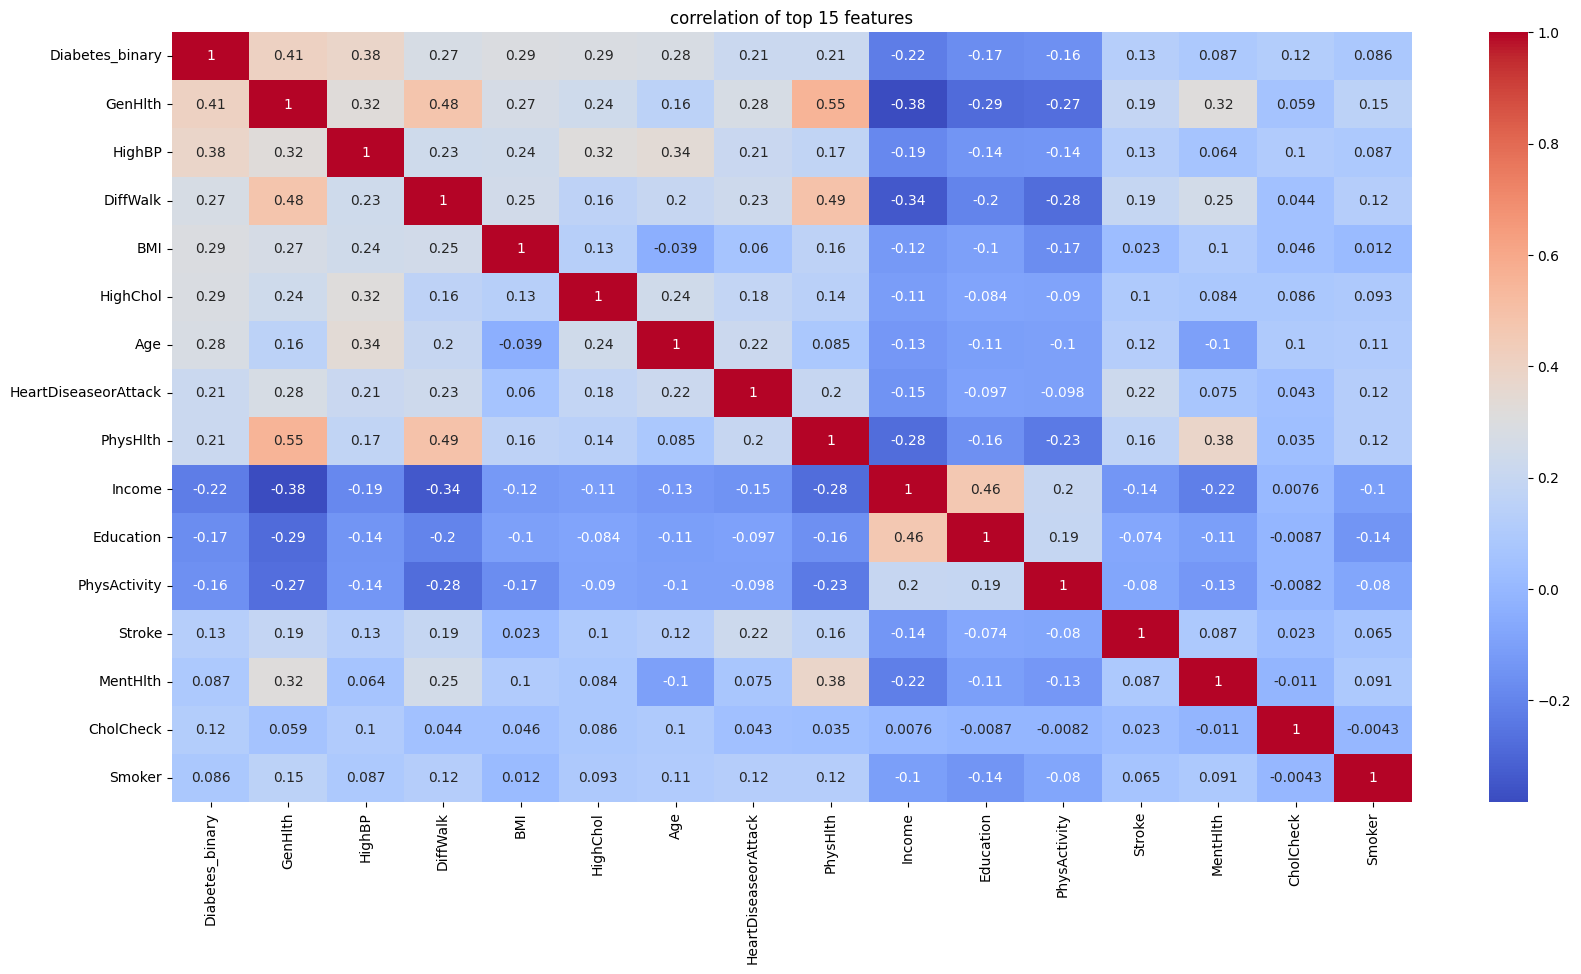

In [26]:
#top 15 heatmap

corr_matrix = df[['Diabetes_binary', 'GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'Education', 'PhysActivity', 'Stroke', 'MentHlth', 'CholCheck', 'Smoker']].corr()

plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix,annot=True , cmap ='coolwarm' )
plt.title("correlation of top 15 features")